### **Course**: BIO-341 [_Dynamical systems in biology_](https://moodle.epfl.ch/course/info.php?id=14291)

**Professor**: _Julian Shillcock_ & _Felix Naef_

SSV, BA5, 2023

Note that this document is primarily aimed at being consulted as a Jupyter notebook, the PDF rendering being not optimal.

In [3]:
# import important libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
from matplotlib.markers import MarkerStyle

set_matplotlib_formats("png", "pdf")

/var/folders/8w/hhwzbx0d6zg_2q5hrl31_yn00000gq/T/ipykernel_32240/3620943358.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("png", "pdf")


# Linear 2D systems and random gene networks

The goal of this exercise is to understand the fixed points and their
stability in linear 2D systems. This will be the basis for the analysis
of nonlinear 2D systems. The general form of a linear system in 2D can be written as: 
\begin{equation}
x'=ax+by
\end{equation}

\begin{equation}
y'=cx+dy
\end{equation}

$ \; a,b,c,d\in\mathbb{R}$
The general solution can be written as 
$$
\boldsymbol{X}(t)=c_{1}\boldsymbol{v}_{1}e^{\lambda_{1}t}+c_{2}\boldsymbol{v}_{2}e^{\lambda_{2}t}
$$
 where $\boldsymbol{X}(t)=(x(t),y(t))$. Here, $c_{i}$ are the coefficients and
$\boldsymbol{v}_{i}$ are the eigenvectors of the matrix $M=\begin{pmatrix}a & b\\
c & d
\end{pmatrix}$ with eigenvalues $\lambda_{i}$. Notice that the eigenvalues, eigenvectors,
and coefficients can be complex numbers. For the notation, we use $\tau = trace(M)$ and $\Delta = det(M)$.


## An unstable fixed point in 2D (Paper and pencil & Python)

Consider the 2-dimensional linear system

$$
\begin{array}{c}
x'=3x+1y\\
y'=2x+2y
\end{array}
$$


**1. Write this system in matrix form. Compute the eigenvalues and the corresponding eigenvectors.**

The matrix form for the system is 
>$$
\begin{pmatrix}x'\\
y'
\end{pmatrix}=\begin{pmatrix}3 & 1\\
2 & 2
\end{pmatrix}\begin{pmatrix}x\\
y
\end{pmatrix}
$$ 


>$$\triangle\left[\begin{pmatrix}3 & 1\\
2 & 2
\end{pmatrix}-\lambda\begin{pmatrix}1 & 0\\
0 & 1
\end{pmatrix}\right]=0\Rightarrow
$$
$$
\Rightarrow\left(3-\lambda\right)\left(2-\lambda\right)-2= 0\rightarrow\lambda^{2}-5\lambda+4=0
\Rightarrow\lambda_{1}=1,\:\lambda_{2}=4
$$
Eigenvectors: $\boldsymbol{v}_{1}=\begin{pmatrix}1\\
-2
\end{pmatrix}$ et $\boldsymbol{v}_{2}=\begin{pmatrix}1\\
1
\end{pmatrix}$

**2. Write down the general solution for this system.**

>$$
\boldsymbol{X}\left(t\right)=c_{1}\begin{pmatrix}1\\
-2
\end{pmatrix}e^{1t}+c_{2}\begin{pmatrix}1\\
1
\end{pmatrix}e^{4t}
$$

**3. Discuss the stability of the fixed point $\left(0,0\right)$.**


>$x'=0=3x+y$, so the x-nullcline is given by the line $y=-3x$.


>$y'=0=2x+2y$, thus the y-nullcline is given by the line $y=-x$. 

The intersection of the nullclines is always $(0,0)$ for 2D linear systems.
Here, it is an unstable fixed point since both eigenvalues are positive
(the exponentials grow in time). Moreover, $\tau=5$, $\Delta=4$ and $\tau^{2}-4\Delta>0$ (cf. exercise 2). In general, the sign
of the real part of the eigenvalues determines the stability of the fixed point.


**4. Compute the trajectory for the initial condition $\left(x_{0},y_{0}\right)=\left(5,3\right)$ at $t=0$.
Discuss its properties.**


>Compute the coefficients: $\boldsymbol{X}\left(0,0\right)=\begin{pmatrix}5,3
 \end{pmatrix}=c_{1}\begin{pmatrix}1\\
-2
\end{pmatrix}+c_{2}\begin{pmatrix}1\\
-2
\end{pmatrix}\rightarrow\left(c_{1},c_{2}\right)=\left(2/3 , 13/3\right)$  
Therefore the solution is $\boldsymbol{X}(t)=
\frac{2}{3} \begin{pmatrix}1\\
-2
\end{pmatrix}e^{t} + \frac{13}{3} \begin{pmatrix}1\\
1
\end{pmatrix}e^{4t}$  
The trajectory starts at (5,3) and moves exponentially away from the
fixed point in the direction of both eigenvectors.
For long times, the trajectory is parallel to the fast direction $\boldsymbol{v}_{2}$
(because $e^{4t}\stackrel{t\rightarrow+\infty}{\gg}e^{t}$). For
times $t\rightarrow-\infty$, the trajectory is parallel to the slow
direction $\boldsymbol{v}_{1}$ (because $e^{4t}\stackrel{t\rightarrow-\infty}{\ll}e^{t}$).
Therefore, the trajectory leaves at the origin and
first moves parallel to the slow direction.


**5. Sketch the vector field for this system and represent the trajectory
from 4. Start by sketching the eigenvectors, calculating and sketching
the nullclines. What are the properties of a vector field along the
nullclines? Complete the vector field using these properties.**

**6. Verify your sketch using the function np.quiver in conjunction with np.meshgrid (look at the Documentation)**

Along the nullcline $x'=0$, the vector field is vertical. On $y'=0$, it is horizontal.

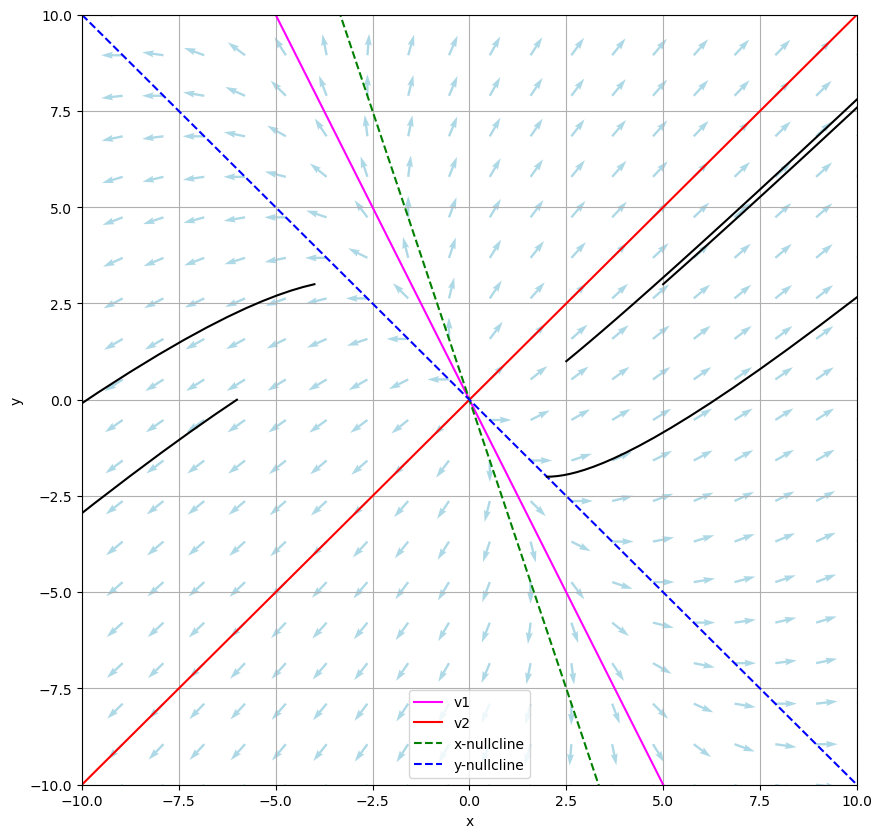

In [4]:
# define the function domain
xdomain = np.linspace(-10, 10, 20)
ydomain = np.linspace(-10, 10, 20)
x, y = np.meshgrid(xdomain, ydomain)  # grid for both coordinates

# compute the derivatives for all points of the grid
dx = 3 * x + 1 * y
dy = 2 * x + 2 * y

# normalize
temp = dx / (dx**2 + dy**2) ** 0.5
dy = dy / (dx**2 + dy**2) ** 0.5
dx = temp

# plot the vectorfield, eigenvectors and nullclines
plt.figure(figsize=(10, 10))  # initialize an empty square figure
plt.quiver(x, y, dx, dy, color="lightblue")  # plot the vectorfield

plt.plot(xdomain, -2*xdomain, c="magenta", label="v1")
plt.plot(xdomain, xdomain, c="red", label="v2")

plt.plot(xdomain, -(3)*xdomain , c="green", ls="--", label="x-nullcline")
plt.plot(xdomain, -1*xdomain , c="blue", ls="--", label="y-nullcline")

# plot some selected trajectories
x0_conditions = [
    (5, 3),
    (-6, 0),
    (2.5, 1),
    (2, -2),
    (-4, 3),
]  # initialize different initial conditions
time_domain = np.linspace(0, 3, 100)

for x0 in x0_conditions:
    [C1, C2] = np.linalg.solve([[1, 1], [1, -2]], x0)
    X1 = C1 * 1 * np.exp(4 * time_domain) + C2 * 1 *np.exp(1 * time_domain)
    X2 = C1 * 1 * np.exp(4 * time_domain) + C2 * -2 * np.exp(1 * time_domain)
    plt.plot(X1, X2, color="black")

# adjust figure parameters
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## Fixed point properties of random 2 genes network (Python).

The goal of this exercise is to practice your Python programming while writing modular code that you will be able to reuse in the next sessions.

Assume that the activities of genes $x$ and $y$ influence each other according to the following simplified linear model

$$
\begin{pmatrix}
\dot x\\
\dot y
\end{pmatrix}
=\begin{pmatrix}a & b\\
c & d
\end{pmatrix}\begin{pmatrix}x\\
y
\end{pmatrix}=M\begin{pmatrix}x\\
y
\end{pmatrix}
$$

in which the parameters $a,b,c,d$ are taken as random real numbers.
Explore the stability properties
of the fixed point $(0,0)$ in this model.

_Remark_: Ignore for a while that this model may not be very realistic to describe biochemical processes.



**1. Write a function named `stability` which determines, based on the interaction matrix $M$, the stability of the fixed point $(0, 0)$.**

Indices:

* This function should take one input argument `M` and output one argument `type_fp`. 

* It should compute the trace $\tau$ and the determinant $\Delta$ of `M`.

* With control statements (if, elif, else), it should determine the stability (stable or unstable fixed points, saddle points, stable or unstable spirals) of the fixed point using the classification scheme below and return it as a string in the variable `type_fp`.

* You can reduce the number of logical tests by separating the fixed points _vs_ spiral _vs_ saddle and stable _vs_ unstable decision and concatenating the two resulting strings.

_Hint: use the trace and determinant of the matrix as illustrated in the figure below._
![](fig1.jpg "Title")


In [4]:
def stability(M):
    tau = M[0, 0] + M[1, 1]
    delta = M[0, 0] * M[1, 1] - M[1, 0] * M[0, 1]
    if delta < 0:
        type_fp = "saddle point"
    elif delta == 0:
        type_fp = "non-isolated fp"
    else:
        if tau**2 - 4 * delta < 0:
            type_fp_2 = "spiral"
        elif tau**2 - 4 * delta == 0:
            type_fp_2 = "star"
        else:
            type_fp_2 = "FP"

        if tau < 0:
            type_fp = "stable " + type_fp_2
        elif tau == 0:
            type_fp = "center "
        else:
            type_fp = "unstable " + type_fp_2
    return type_fp

**2. Test your code using the matrix provided in Exercise 1 above.**

In [5]:
# matrix from exercise 1
M = np.array([[1, 4], [-2, 7]])
print(stability(M))

unstable FP


**3. Let's now sample randomly the possible values of $M$ and determine the proportion of each type of fixed point.**

Write a script that allows you to generate N different random matrices. Your script can perform the following steps: 
1. For the matrix entries (2x2 matrix), use a uniform distribution on the interval $[-1,1]$. You can use the function  `np.random.rand()` (look at the Documentation)
2. As an output of your result, you can generate a histogram showing the different type of fixed points found.
3. Test your code for 200 samples. Then, increase this value. Which proportions do you find?

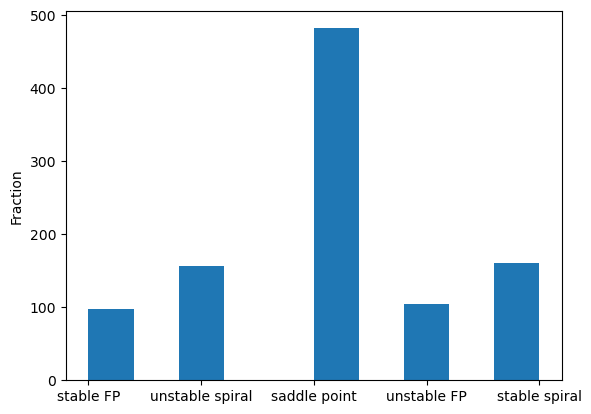

In [6]:
N = 1000
l_type_fp = []
# generate N random matrices
for n in range(N):
    M = (
        np.random.rand(2, 2) * 2 - 1
    )  # x*2-1 with x between 0 and 1 guarantees a results between -1 and 1
    type_fp = stability(M)
    l_type_fp.append(type_fp)  # fill a list with the different types of fp
plt.hist(l_type_fp, histtype="barstacked")  # make a histogram from the list
plt.ylabel("Fraction")
plt.show()

The proportions tend to (approximately) $\frac{1}{12}$ of stable and unstable fixed points, $\frac{1}{6}$ of stable and unstable spirals, and $\frac{1}{2}$ of saddle points..

If we want to see how our random matrices are actually distributed in the $\tau-\Delta$ plane, it's very easy:

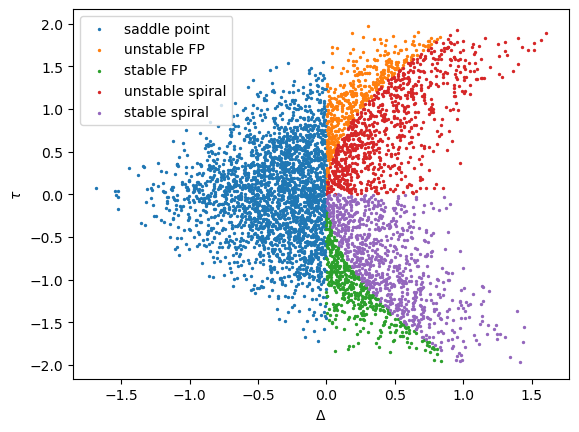

In [7]:
N = 5000
dic_result = {
    "saddle point": [],
    "unstable FP": [],
    "stable FP": [],
    "unstable spiral": [],
    "stable spiral": [],
}
# generate N random matrices
for n in range(N):
    M = (
        np.random.rand(2, 2) * 2 - 1
    )  # x*2-1 with x between 0 and 1 guarantees a results between -1 and 1
    tau = M[0, 0] + M[1, 1]
    delta = M[0, 0] * M[1, 1] - M[1, 0] * M[0, 1]
    type_fp = stability(M)
    dic_result[type_fp].append([delta, tau])


for type_fp, coordinates in dic_result.items():
    # convert the list of coordinates into a 2d-array
    coordinates = np.array(coordinates)
    # make a scatterplot for all coordinates of a given type of fp
    plt.scatter(coordinates[:, 0], coordinates[:, 1], label=type_fp, s=2)
plt.ylabel(r"$\tau$")
plt.xlabel(r"$\Delta$")
plt.legend()
plt.show()